## Before you start


**We** recommend running this notebook on Google Colab to avoid having to install dependencies.

## Load packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
np.random.seed(0)
number_of_samples = 5000

## Provided Code

### Generate Samples from Gaussian

In [ ]:
def generate_gaussian_samples(mean, cov, num):
  """
  mean: 1-D array_like, of length D. Mean of the D-dimensional distribution.
  cov: 2-D array_like, of shape (D, D). Covariance matrix of the distribution. 
  num: desired number of samples to generate.
  return: ndarray, of shape (num, D). The drawn samples. 
  """
  samples = np.random.multivariate_normal(mean, cov, num)
  return samples

### Generate Scatter Plot of Samples

In [ ]:
def scatter_plot(samples):
  """
  samples: 2-D array_like, of shape (num, D). Samples to plot.
  """
  plt.plot(samples[:,0], samples[:,1], 'x')
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

### Generate KDE Plot of Estimated Densities

In [ ]:
def KDE_plot(samples):
  """
  samples: 2-D array_like, of shape (num, D). Samples to plot.
  """
  ax = sns.jointplot(x=samples[:,0], y=samples[:,1], kind="kde")
  ax.set_axis_labels(xlabel='Dimension 1', ylabel='Dimension 2')
  plt.tight_layout()
  plt.show()

## Part e: Multivariate Gaussian

In [ ]:
def estimate_mean(samples):
  """
  You cannot use the built-in Numpy functions. You can only use built-in Numpy
  functions for other elementary operations, such as summation and matrix multiplication
  samples: 2D ndarray of shape (num, D). The samples from the distribution whose mean you would like to estimate
  return: 1D ndarray of length D. Sample mean.
  """
  assert(isinstance(samples, np.ndarray))
  assert(len(samples.shape) == 2)
  assert(samples.dtype == np.float64)
  
  # TODO: Implement me
  mu = np.sum(samples, axis=0)/len(samples)
  return mu

In [ ]:
def estimate_cov(samples):
  """
  You cannot use the built-in Numpy functions. You can only use built-in Numpy
  functions for other elementary operations, such as summation and matrix multiplication
  samples: 2D ndarray of shape (num, D). The samples from the distribution whose covariance you would like to estimate
  return: 2D ndarray of shape (D, D). Sample covariance matrix. 
  """
  assert(isinstance(samples, np.ndarray))
  assert(len(samples.shape) == 2)
  assert(samples.dtype == np.float64)
  
  # TODO: Implement me
  mu = estimate_mean(samples)
  cov = sum([np.outer((i-mu),(i-mu).T) for i in samples])/(len(samples)-1)
  return cov

Estimated Mean for sample:  [1.92625919 2.97653322]
Estimated Cov for sample:  [[ 9.84299625 -0.03244733]
 [-0.03244733  2.89973631]]


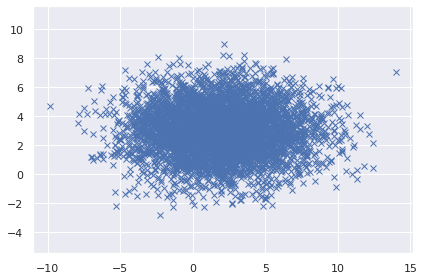

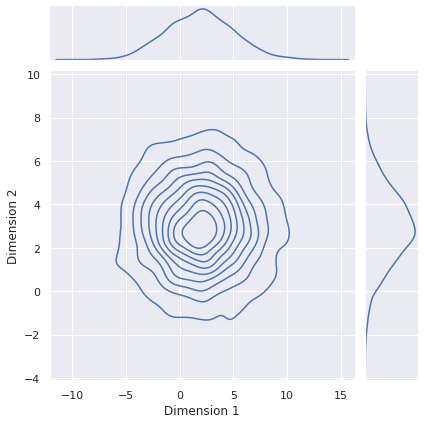

In [ ]:
# TODO: Implement me
number_of_samples = 5000
mean = np.array([2,3])
cov = np.array([[10, 0], [0, 3]])
samples = generate_gaussian_samples(mean, cov, number_of_samples)

# Do not modify the lines below

estimated_mean = estimate_mean(samples)
assert(estimated_mean.dtype == np.float64)
estimated_cov = estimate_cov(samples)
assert(estimated_cov.dtype == np.float64)
assert(estimated_cov.shape == (2, 2))
#to see estimated mean, cov
print("Estimated Mean for sample: ", estimated_mean)
print("Estimated Cov for sample: ", estimated_cov)

scatter_plot(samples)
KDE_plot(samples)

## Part f: Transformation of Multivariate Gaussian

In [ ]:
def transformation(samples, mean):
  """
  samples: 2D ndarray of shape (num, D). The samples you like to transform. 
  mean: 1D ndarray of length D. The true mean of the distribution from which samples were drawn. 
  return: 2D ndarray of shape (num, D). Transformed samples. 
  """
  assert(isinstance(samples, np.ndarray))
  assert(len(samples.shape) == 2)
  assert(samples.dtype == np.float64)
  assert(isinstance(mean, np.ndarray))
  assert(len(mean.shape) == 1)
  assert(mean.dtype == np.float64)
  assert(mean.shape[0] == samples.shape[1])
  
  # TODO: Implement me
  X1 = samples[:,0]
  X2 = samples[:,1]

  for i in range(len(samples)):
    if (X1[i] >= mean[0]):
      samples[i,1] = abs(X2[i]-mean[1])+mean[1]
    else:
      samples[i,1] = -(abs(X2[i]-mean[1]))+mean[1]

  return samples

  pass

Estimated Mean for sample:  [1.92625919 2.98222446]
Estimated Cov for sample:  [[9.84299625 3.36449469]
 [3.36449469 2.89997108]]


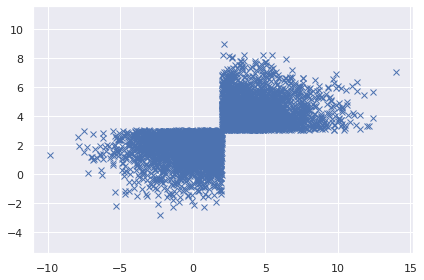

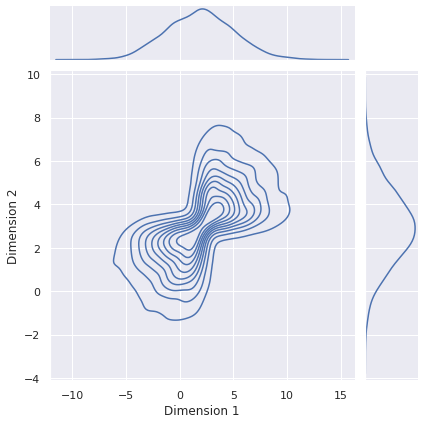

In [ ]:
# TODO: Implement me
mean = np.array([2.,3.])
samples2 = transformation(samples, mean)

# Do not modify the lines below

estimated_mean2 = estimate_mean(samples2)
assert(estimated_mean2.dtype == np.float64)
estimated_cov2 = estimate_cov(samples2)
assert(estimated_cov2.dtype == np.float64)
assert(estimated_cov2.shape == (2, 2))

#to see estimated mean, cov
print("Estimated Mean for sample: ", estimated_mean2)
print("Estimated Cov for sample: ", estimated_cov2)

scatter_plot(samples2)
KDE_plot(samples2)

## Part g: Independent Univariate Gaussians

Estimated Mean for sample:  [2.01712188 3.02868553]
Estimated Cov for sample:  [[ 9.84432268 -0.03155517]
 [-0.03155517  2.96464599]]


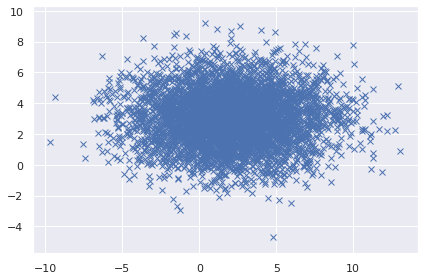

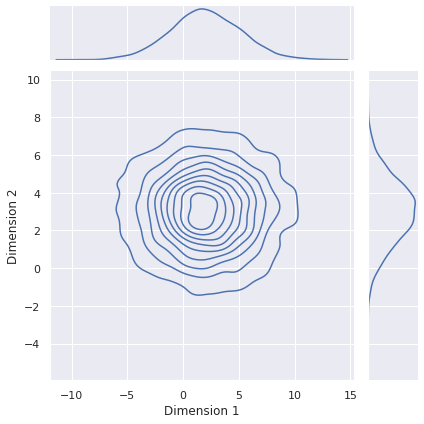

In [ ]:
# TODO: Implement me
y = np.random.normal(2, 10**(1/2), number_of_samples)
z = np.random.normal(3, 3**(1/2), number_of_samples)

samples3 = np.vstack((y,z)).T

# Do not modify the lines below

estimated_mean3 = estimate_mean(samples3)
assert(estimated_mean3.dtype == np.float64)
estimated_cov3 = estimate_cov(samples3)
assert(estimated_cov3.dtype == np.float64)
assert(estimated_cov3.shape == (2, 2))

#to see estimated mean, cov
print("Estimated Mean for sample: ", estimated_mean3)
print("Estimated Cov for sample: ", estimated_cov3)

scatter_plot(samples3)
KDE_plot(samples3)